In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
from sklearn.datasets import load_boston

In [0]:
# ボストンの住宅価格の情報を取得する
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

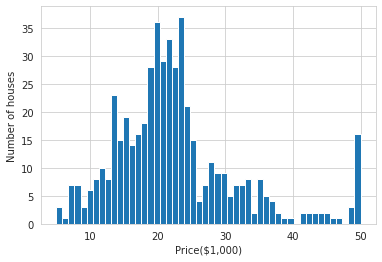

In [5]:
# ヒストグラムを書いてみる
plt.hist(boston.target, bins=50)
plt.xlabel('Price($1,000)')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of rooms')

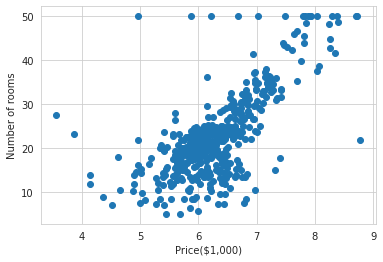

In [6]:
# 部屋数のデータを取得する
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel('Price($1,000)')
plt.ylabel('Number of rooms')

In [0]:
# sklearのデータをDataFrameに変換する
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
# 住宅価格カラムを追加する
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


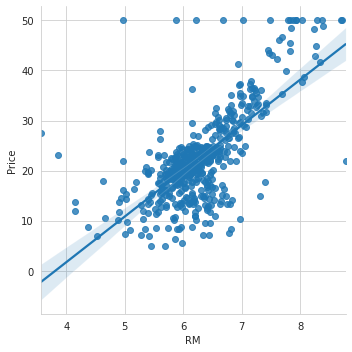

In [11]:
# Seabornで回帰直線を引く
sns.lmplot('RM', 'Price', data=boston_df)

In [0]:
X = boston_df.RM

In [13]:
X.head

<bound method NDFrame.head of 0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64>

In [0]:
X = np.vstack(boston_df.RM)

In [15]:
X.shape

(506, 1)

In [0]:
Y = boston_df.Price

In [0]:
# numpyにデータを入れるために行列の内積に変換する

In [0]:
X = np.array([[value, 1] for value in boston_df.RM])

In [0]:
# 線形代数
a, b = np.linalg.lstsq(X, Y, rcond=None)[0]

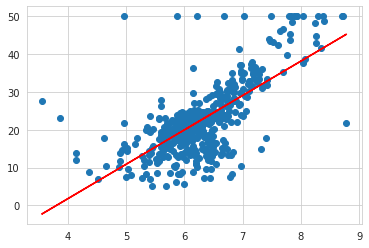

In [20]:
# 回帰直線を描画する
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, a*x+b, 'r')

In [0]:
result = np.linalg.lstsq(X, Y, rcond=None)

In [22]:
result

(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [0]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))

In [25]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


In [0]:
import sklearn
from sklearn.linear_model import LinearRegression

In [0]:
lreg = LinearRegression()

In [0]:
X_multi = boston_df.drop('Price', 1)

In [31]:
X_multi.shape

(506, 13)

In [0]:
Y_target = boston_df.Price

In [33]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# 決定係数 b
lreg.intercept_

36.45948838508978

In [35]:
len(lreg.coef_)

13

In [0]:
coeff_df = DataFrame(boston_df.columns)

In [0]:
coeff_df.columns = ['Features']

In [0]:
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

In [40]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335
